# <center> Git Class </center>


## What is Git good for?

- Organize and share a project

- Keep track of changes to files.

- Notice conflicts between changes made by different people.

- Synchronize files between different computers.

- Fantastic work collaboration with any text or code, for example a TeX file.


Git saves things in a ***Repository*** (**REPO**), which consists of:
   - Files and directories that you create and edit
   - Extra information recorded about the project's history --> Stored in REPO/.git/
   
You can have local REPOs and remote REPOs (on Github).
HHU also has a gitlab server: https://git.hhu.de/

## <center > Overview and important terms </center>

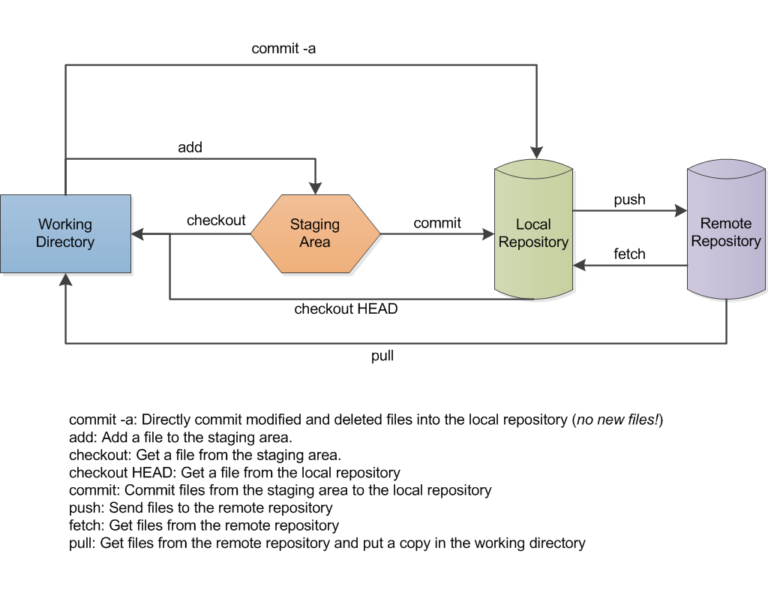

#  Create or clone repositories

In [2]:
import os     # (python)

# Start new repository
#! git init new_repo_name 

# Copy existing REPO
! git clone https://github.com/ViriatoII/gitclass

os.chdir("gitclass/")  # Change directory (in Python)

In [3]:
# See where a cloned repository originated
! git remote -v

origin	https://github.com/ViriatoII/gitclass (fetch)
origin	https://github.com/ViriatoII/gitclass (push)


When cloning, the remote REPO is automatically allocated, called ***Origin*** by default.
You can add a remote with:

<blockquote> 
git remote add remote-name URL-OR-PATH </blockquote>  

and remove an existing one with:

<blockquote> 
git remote rm remote-name</blockquote>  



 # git status  
 ##  Shows which files have been changed relative to remote REPO

In [4]:
! git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	new file:   ai

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   newfile



## How does Git work?

Git has a staging area where it stores files with changes you want to save. But they only become real after commiting them!

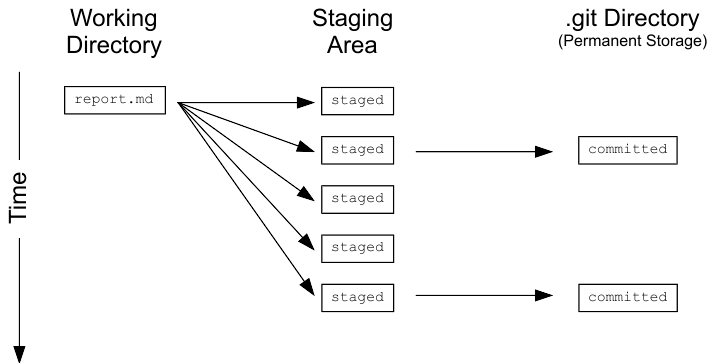

Every commit has a **Hash** code (unique). 
The first (usually 4) chars of hash are often used as process ID.     
There are shortcuts for this hash code: **HEAD**, **HEAD2**, **HEAD3**, for last, pre-last, pre-prelast commit, etc..



**git status** shows which files are in this staging area, and which files have changes that haven't yet been put there.      
**git diff *directory*** - shows changes to all files in directory.     
**git diff *filename***  - Compare changes on specific file to what was last saved       


In [11]:
! echo "Something" > newfile

! git add newfile  # Add file to staging area
#! git clean -f    # Remove all staged files (-force)

! git status   # Now status is different

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	new file:   newfile



In [23]:
# Save all "added" files to the Repository (each commit has own hash code). -m Is message log related to commit
! git commit  -m "Adding file" 

#If you accidentally mistype a commit message
! git commit --amend -m "Adding file X for function Z"

# Shows all logged commits. 
! git log        # If you give it a filename (that has been commited) or HEAD, shows only commits for those

[main db17c65] Adding file X for function Z
 Date: Thu Apr 29 11:07:55 2021 +0200
 1 file changed, 1 insertion(+)
 create mode 100644 newfile
commit db17c65eb73bf8130bbb2b6a7616856f6e979e43 (HEAD -> main)
Author: ViriatoII <ricardoguerreiro21@hotmail.com>
Date:   Thu Apr 29 11:07:55 2021 +0200

    Adding file X for function Z

commit 17b927ea178527ea5e96cbbf0f7517ae2dc1475d (origin/main, origin/HEAD)
Author: ViriatoII <ricardoguerreiro21@hotmail.com>
Date:   Wed Apr 28 17:49:40 2021 +0200

    Initial commit


 #### Question: What is git status now?

## Push commit to remote repository

 Update the remote REPO github with the lastest commit:

       git push                 # Only I can do it because it's my own private REPO

## Compare file changes to previous versions in REPO

Now that a previous commit exists, if you change *newfile* and see the differences between new version and commited one:

 (this is more intuitive on browser in Github)
 
To see changes you have made to a file, use git diff file before git add/commit, and you will see that changes that will be commited.

### With <span style="background-color: #FFFF99">git diff directory </span>

        git diff newfile  

    diff --git a/newfile b/newfile
    index 0f2416e..e2c62e4 100644            # HEAD..HEAD2
    --- a/newfile                            # a -> first  version ; ----- -> Lines removed 
    +++ b/newfile                            # b -> second version ; +++++ -> Lines added
    @@ -1 +1 @@                              # @@ -> what changes happened: 1 line erased, 1 line added
    -Something                               # This line was erased
    +A new line                              # This line is new

In [7]:
# See file differences against particular commit
! git diff  -r HEAD newfile # file optional
            # -r flag means "compare to a particular revision"

diff --git a/newfile b/newfile
index 0f2416e..e2c62e4 100644
--- a/newfile
+++ b/newfile
@@ -1 +1 @@
-Something
+A new line


# git checkout     

### discard changes   (also later to swich branches)

In [14]:
# discard unstaged changes of file
! git reset newfile # or HEAD 
! git checkout -- newfile

In [ ]:
# restore older commit
! git checkout HEAD <filename>

# Undo changes 
! git reset HEAD <filename>

# Undo all changes 
! git checkout -- .  # . is current directory

## Git settings

useful for storing your name or email (to identify you in commit logs), choosing your favorite text editor and diff view tools,

### Show all configured settings
**git config --list**  
  Additional flags:           
  
    --system # settings for every user on computer/
    --global # settings for one user 
    --local  # settings for one user/specific project

In [ ]:
# Change a setting:
! git config --global user.email guerrer@hhu.de
! git config --global core.editor  vim

## Other learning resources:

http://ndpsoftware.com/git-cheatsheet.html


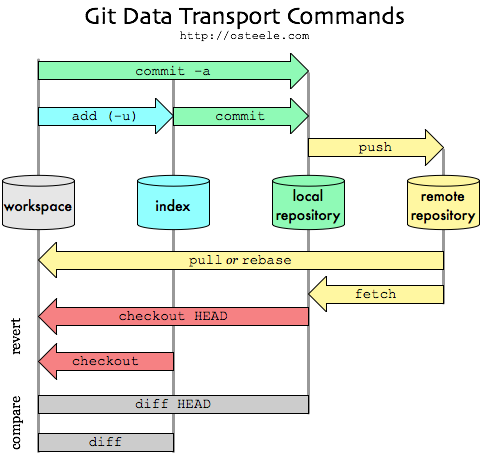

# Branches

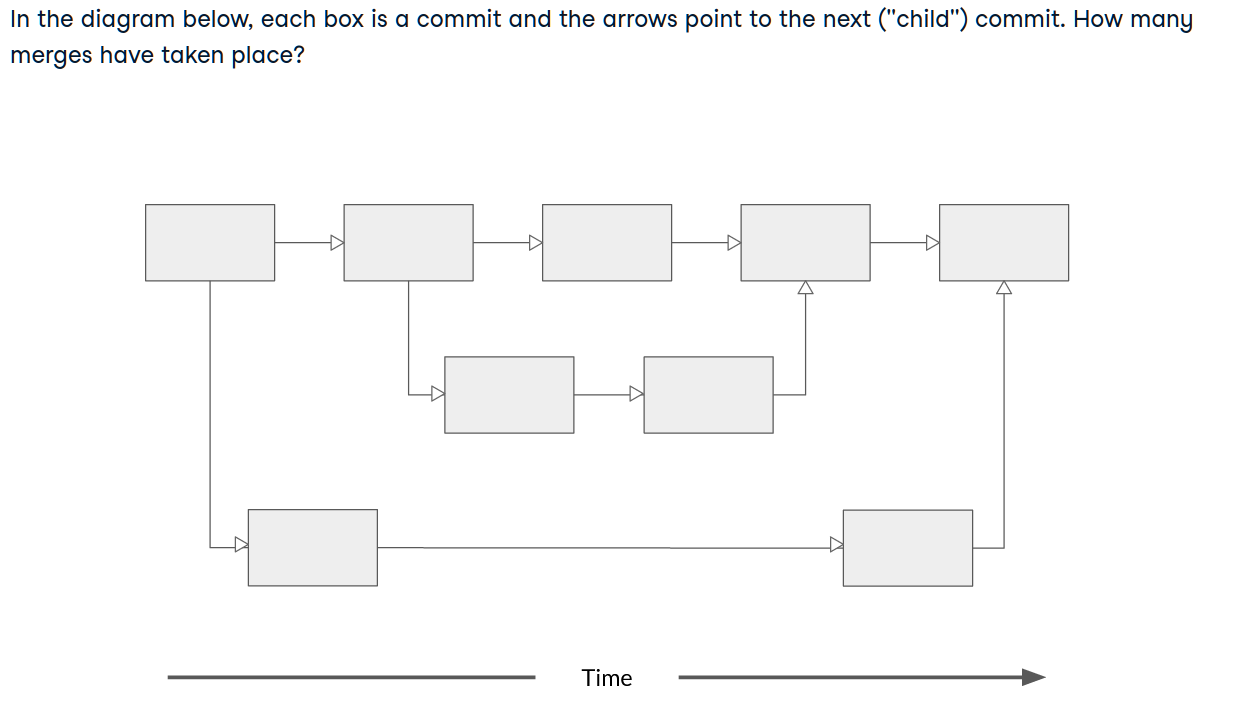


The default name of the original branch is **main** and the **secondary** branches you create are named by you (Used to be ***master*** and ***slave*** branches but changed for political correctness, you might still see it around)

In [16]:
# See all available branches in work_dir
! git branch

* main


In [25]:
# Create branch
! git checkout -b branch2   # -b parameter important

# Change branch   # git checkout with a hash/branch basically switches the repository state to that commit/branch.
! git checkout branch2    

fatal: A branch named 'branch2' already exists.
Already on 'branch2'


In [30]:
# See differences (in files) between branches
! git diff main..branch2

# Remove branch
#! git rm # removes the file (just like in unix), then stages the removal of that file with git add, all in one step.

diff --git a/2nd_file.txt b/2nd_file.txt
new file mode 100644
index 0000000..146a621
--- /dev/null
+++ b/2nd_file.txt
@@ -0,0 +1 @@
+More data


#### Try removing a file in a branch, then change branch and see that the file is not there!
- You are master branch. Create a new branch called "Deleter_branch".          
- Use git rm filename.txt to delete the file.             
- Commit your changes with a log message.                
- Use git diff to compare master branch with the new branch.  

# Merge branches

In [ ]:
! git merge branch2 main  -m "Message: Merging branch2 with master"

The branch you merge will be merged with the current one. See: with git status

## Conflicts

The file todo.txt initially contains these two lines:      
<blockquote> 
A) Write report.  

B) Submit report.</blockquote>  
            

You create a branch called update and modify the file to be:               
<blockquote> 
A) Write report.  

B) Submit final version.  
C) Submit expenses.                     
</blockquote> 
You then switch back to the master branch and delete the first line, so that the file contains:                     

<blockquote> B) Submit report.</blockquote>                     

When you try to merge update and master, what happens? You can use git diff master..update to view the difference between the two branches.

# Pull and Push changes from/to remote repositories

#### If the REPO is updated after you cloned it, you can pull the new changes to your local copy

In [ ]:
# Pull changes from remote
! git pull remote branch    #if branch is not specified, pulls to master
                            # use --no-edit to avoid having to give a message as prompt

If there are unsaved changes in your current branch that were not in remote, it will give an error.

Solutions: 
    - Commit local changes
    - Discard local changes (git checkout -- .), and then try to pull again.
    
## Push changes to remote repository

remember that the change needs to first be:
 - Added to the staging area: git add path/file
 - Commited: git commit -m "File X was added"

In [ ]:
# Push changes to remote  (normally origin)
! git push remote_name branch_name

## What happens if my push conflicts with someone else's work?

Push is **refused**

# Fork a project

#### Useful when you want to work on a project but don't have permission to push code directly

In [ ]:
# Summary

git init or gti clone
(git diff file)
git add .
git commit -m "Comment"
git push

Profit!